In [5]:
import torch
import random
import numpy as np
from deepSVDD import DeepSVDD
from datasets.main import load_dataset
from base.base_dataset import BaseADDataset
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(r'multiclass15\csv_result-data1 Sampled Scenarios.csv')
for i in range(2, 16):
    tmp = pd.read_csv(r'multiclass15\csv_result-data'+str(i)+' Sampled Scenarios.csv')
    df = pd.concat([df, tmp], ignore_index=True)

# df = pd.read_csv(file_path)
df = df.replace([np.inf, -np.inf], np.nan).dropna()
df = df.drop('id', axis=1)

# 標籤處理
y = df['marker']
y = [0 if value in [41] else 1 for value in y]
X = df.drop('marker', axis=1)

# 刪除不必要的欄位
columns_to_drop = ['control_panel_log1', 'control_panel_log2', 'control_panel_log3', 
                'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log', 
                'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4']
X = X.drop(columns=columns_to_drop, axis=1)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# PCA 降維
# pca = PCA(n_components=15)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train, columns=['label'])

X_train_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

merged_df = pd.concat([X_train_df, y_train_df], axis=1)

label_0_data = merged_df[merged_df['label'] == 0]
train_data = label_0_data.drop('label', axis=1)

# Min-Max 標準化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_data)

X_test = scaler.transform(X_test)



In [7]:
from pyod.models.dif import DIF
from pyod.models.deep_svdd import DeepSVDD


# model = DeepSVDD(n_features=116)
model = DIF()
model.fit(X_train)



y_train_scores = model.decision_function(X_test)
y_pred = model.predict(X_test)

Accuracy: 0.9322233784252515
F1 Score: 0.9649229885470146
Precision: 0.9384733570780083
Recall: 0.9929067533619034


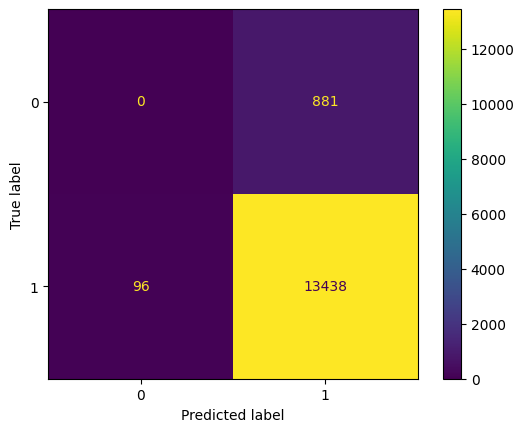

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()